# monexo dpd(days per due) case

# This the part of the second question, I have splitted into two becuase of the convenience of checking.
# Make sure to run the code, we have to import the train-test part and the ada boost part again

In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


# vintage curve of 30+ DPD (Days Past Due) from the given data

In [3]:
q1=pd.read_csv('C:/Users/Administrator/Desktop/reconfirmationofinterview/payment_history.csv')
q1.head()

,Unnamed: 0,Loan.ID,DPD,DPAmount,Mth,number
0,1,LAI-00000029,0.0,0.0,2017-02-01,1
1,2,LAI-00000030,0.0,0.0,2017-02-01,1
2,3,LAI-00000030,0.0,0.0,2017-03-01,2
3,4,LAI-00000030,0.0,0.0,2017-04-01,3
4,5,LAI-00000030,0.0,0.0,2017-05-01,4


In [128]:
q1['date'] = pd.to_datetime(q1['Mth'])
q1['year']=q1['date'].dt.year
q1['month']=q1['date'].dt.month
q1=q1.drop('Mth',axis=1)
q1.head()

,Unnamed: 0,Loan.ID,DPD,DPAmount,number,date,year,month
0,1,LAI-00000029,0.0,0.0,1,2017-02-01,2017,2
1,2,LAI-00000030,0.0,0.0,1,2017-02-01,2017,2
2,3,LAI-00000030,0.0,0.0,2,2017-03-01,2017,3
3,4,LAI-00000030,0.0,0.0,3,2017-04-01,2017,4
4,5,LAI-00000030,0.0,0.0,4,2017-05-01,2017,5


In [129]:
q1=q1.groupby('Loan.ID').max()
q1.head()

,Unnamed: 0,DPD,DPAmount,number,date,year,month
Loan.ID,,,,,,,
LAI-00000029,1,0.0,0.0,1,2017-02-01,2017,2
LAI-00000030,18,0.0,0.0,17,2018-06-01,2018,12
LAI-00000033,35,181.0,26148.0,17,2018-06-01,2018,12
LAI-00000034,52,0.0,0.0,17,2018-06-01,2018,12
LAI-00000036,58,0.0,0.0,6,2017-07-01,2017,7


In [130]:
q2=q1[q1.DPD>30][['DPAmount','number','year','date','month']]
q2.head()

,DPAmount,number,year,date,month
Loan.ID,,,,,
LAI-00000033,26148.0,17,2018,2018-06-01,12
LAI-00000048,47524.0,17,2018,2018-06-01,12
LAI-00000049,7740.0,17,2018,2018-06-01,12
LAI-00000050,20042.0,17,2018,2018-06-01,12
LAI-00000053,149997.0,17,2018,2018-06-01,12


In [131]:
cum_per=(100*(q2['DPAmount'].cumsum()))/(q2['DPAmount'].sum())
q2['cumulative_percent']=cum_per
q2.head()

,DPAmount,number,year,date,month,cumulative_percent
Loan.ID,,,,,,
LAI-00000033,26148.0,17,2018,2018-06-01,12,0.520473
LAI-00000048,47524.0,17,2018,2018-06-01,12,1.466433
LAI-00000049,7740.0,17,2018,2018-06-01,12,1.620497
LAI-00000050,20042.0,17,2018,2018-06-01,12,2.019431
LAI-00000053,149997.0,17,2018,2018-06-01,12,5.005105


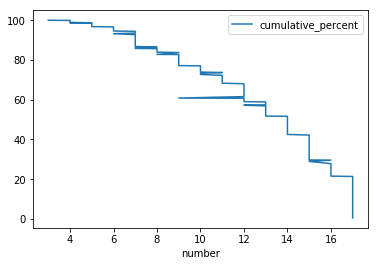

In [132]:
plt.figure(figsize=(20,20))
q2.plot('number','cumulative_percent')
plt.show()

## When number of months are less, there are more defaulters in payment. As the number of months increases number of defaulters decreases.

In [133]:
xx=q2[['number']]
yy=q2[['cumulative_percent']]
zz=q2[['year']]

In [134]:
pred_probs1 = pd.DataFrame(model_4aa.predict_proba(test_x),columns=['Neg','neutral', 'Pos'])
pred_probs=pred_probs1.drop('neutral',axis=1)
pred_probs.head()

,Neg,Pos
0,1.578403e-10,1.787807e-10
1,1.578403e-10,1.787807e-10
2,1.578403e-10,1.787807e-10
3,1.578403e-10,1.787807e-10
4,1.578403e-10,1.787807e-10


In [135]:
pred_test = pred_probs['Pos'].apply(lambda v: 1 if v>0.5 else 0)
fp_dt,tn_dt,tp_dt= roc_curve(test_y,pred_probs['Neg'],pos_label=1)    
fp_dt,tp_dt,tn_dt
auc_dt= auc(fp_dt,tp_dt)
auc_dt

0.5845888847031885

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)


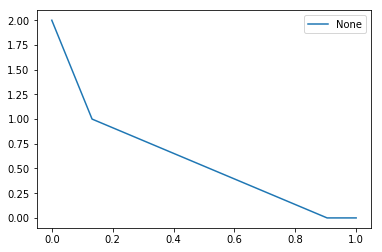

In [103]:
plt.plot(fp_dt,tp_dt)
plt.legend([print(model_4aa),auc_dt])
plt.show()

## Shows the relation of sensitivity and specificity- AUC-ROC Curve